# Projet MLOps - Prédiction des Défauts de Paiement

## 1. Appropriation du Sujet

### Analyse du problème
Le but est de prédire le défaut de paiement sur des prêts personnels. Comprenez les enjeux financiers pour la banque ainsi que les besoins de précision du modèle pour l'allocation des capitaux.

### Objectif business
Minimiser les risques de défaut en optimisant la gestion du portefeuille des prêts.

### Objectif technique
Créer un modèle prédictif de machine learning capable de prévoir si un emprunteur risque de faire défaut.

---

## 2. Pré-traitement des Données

### Chargement des données
Utilisez la base de données "Loan_Data.csv" fournie. Importez les données dans un notebook Python via Pandas.

### Exploration des données
Analysez la distribution des variables avec des statistiques descriptives pour identifier les caractéristiques importantes (par exemple, le revenu, le montant du prêt, l’historique de crédit, etc.).

### Nettoyage des données
- Gérez les valeurs manquantes (remplissage ou suppression selon le contexte).
- Encodage des variables catégorielles.
- Standardisation ou normalisation des variables numériques.

### Séparation des données
Divisez les données en deux ensembles : **données d'entraînement** et **données de test** (par exemple, 80/20).

### Feature engineering
Créez de nouvelles variables si nécessaire, par exemple, des ratios d’endettement ou des indicateurs basés sur l’historique de crédit.

---

## 3. Model Engineering

### Sélection des algorithmes
Testez deux algorithmes de classification (comme demandé dans les consignes) :
- **Régression logistique** (Logistic Regression)
- **Forêt aléatoire** (Random Forest)

### Entraînement des modèles
- Pour chaque algorithme, entraînez le modèle sur les données d’entraînement.
- Utilisez des techniques de validation croisée pour optimiser les hyperparamètres.

### Évaluation des modèles
Comparez les performances des modèles sur les données de test avec des métriques comme l’**accuracy**, la **précision**, le **rappel**, et l’**AUC-ROC**.

### Suivi des expériences avec MLflow
- Configurez MLflow pour suivre chaque exécution des modèles.
- Enregistrez les métriques et les hyperparamètres de chaque modèle.
- Identifiez quel modèle fonctionne le mieux (en fonction des métriques d'évaluation).

---

## 4. Déploiement du modèle

### Sélection du meilleur modèle
Une fois les performances comparées, sélectionnez le modèle avec les meilleures prédictions sur les données de test.

### Création d’une API avec Flask ou Streamlit
- Créez une application web avec Flask ou Streamlit pour permettre aux utilisateurs de soumettre des données clients et recevoir une prédiction de probabilité de défaut.
- Assurez-vous que l'interface utilisateur soit simple et intuitive.

### Déploiement sur le cloud
- Utilisez une plateforme de cloud comme **AWS**, **Google Cloud**, ou **Heroku** pour déployer l'application.
- Mettez en place un pipeline CI/CD pour automatiser le processus de mise à jour du modèle sur le cloud. Chaque nouveau modèle ou mise à jour est directement intégré dans le déploiement.

---

## 5. Suivi et Maintenance

### Monitoring
Mettez en place des outils pour surveiller la performance du modèle en production (détection des dérives de données, alertes en cas de baisse de performance).

### Mise à jour continue
Utilisez MLOps pour automatiser le réentraînement du modèle lorsque de nouvelles données sont disponibles.

---

## 6. Gestion de version et collaboration

### Versioning avec Git
- Créez un dépôt Git dès le début du projet pour suivre les modifications du code.
- Utilisez des branches pour gérer les différentes phases de développement (pré-traitement, modélisation, déploiement).
- Documentez chaque commit pour maintenir une trace claire de l’évolution du projet.

### Collaboration en équipe (si applicable)
- Si le projet est réalisé en groupe, déterminez les responsabilités de chaque membre.
- Par exemple, une personne peut se concentrer sur le traitement des données, une autre sur la modélisation, et une autre sur le déploiement.

---

## 7. Pipeline CI/CD

### CI/CD
- Configurez un pipeline d'intégration et de déploiement continu.
- Cela peut inclure :
  - Des tests unitaires automatiques pour chaque modification.
  - La validation du modèle sur des environnements de test avant le déploiement en production.
  - L'automatisation du déploiement en production à chaque mise à jour du code ou du modèle.

---

| **Variable**                | **Description**                                                |
|-----------------------------|----------------------------------------------------------------|
| `customer_id`                | ID unique du client.                                           |
| `credit_lines_outstanding`   | Nombre de lignes de crédit en cours.                          |
| `loan_amt_outstanding`       | Montant restant du prêt.                                       |
| `total_debt_outstanding`     | Dette totale en cours.                                         |
| `income`                     | Revenu du client.                                              |
| `years_employed`             | Nombre d'années d'emploi.                                      |
| `fico_score`                 | Score FICO du client (indicateur de la solvabilité).           |
| `default`                    | Indicateur de défaut (1 pour défaut, 0 sinon).                 |


#### Importation des packages

In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Manipulation des données 
import pandas as pd 
import numpy as np 

# Visualisation des données
import matplotlib.pyplot  as plt 
import plotly.express as px
import seaborn as sns 
import plotly.graph_objects as go

# Tests statistique(khi-deux)
from scipy.stats import chi2_contingency

# Gestion des message d'averstissement()
import warnings
warnings.filterwarnings("ignore")

# afficher des barres de progression  dans le notebooks Jupyter. 
from alive_progress import alive_bar
import time

# Afficher les version des lib 
import watermark

# Pour le preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

# Pour l'apprentissage
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score, train_test_split

# Importer toutes les métriques pour l'évaluation
from sklearn.metrics import *   

# Importance des caractéristiques
import shap

# Initialiser la bibliothèque JavaScript de SHAP
shap.initjs()


# afficher les versions des bibliothèques et des dépendances utilisées
%reload_ext watermark
%watermark -a "Library versions" --iversions


Author: Library versions

seaborn   : 0.13.2
plotly    : 5.22.0
sklearn   : 1.4.2
xgboost   : 2.1.1
numpy     : 1.26.4
shap      : 0.46.0
pandas    : 2.2.2
watermark : 2.4.3
matplotlib: 3.8.4



In [20]:
# Charger les données
df = pd.read_csv(r"C:\Users\carlène Tungamwese\OneDrive\Bureau\Nouveau dossier\FORMATION\ML Ops\Loan_Data (1).csv")

In [21]:
# Afficher les premières lignes du jeu de données
data_head = df.head()
data_info = df.info()

data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


(   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
 0      8153374                         0               5221.55   
 1      7442532                         5               1958.93   
 2      2256073                         0               3363.01   
 3      4885975                         0               4766.65   
 4      4700614                         1               1345.83   
 
    total_debt_outstanding   income  years_employed  fico_score  default  
 0                 3915.47 78039.39               5         605        0  
 1                 8228.75 26648.44               2         572        1  
 2                 2027.83 65866.71               4         602        0  
 3                 2501.73 74356.88               5         612        0  
 4                 1768.83 23448.33               6         631        0  ,
 None)

In [22]:
# La dimension du dataframe 
print(f"\n Le dataset contient: {df.shape[0]} lignes et \n {df.shape[1]} colonnes")


 Le dataset contient: 10000 lignes et 
 8 colonnes


In [23]:
# Le type de données des variables 
print("\n Le type des différentes colonnes est: ")
df.dtypes


 Le type des différentes colonnes est: 


customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

#### 2- Analyse exploratoire des données(EDA)

In [24]:
# Statistisques descriptives 
pd.options.display.float_format = '{:.2f}'.format

# Afficher les statistiques descriptives
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
customer_id,10000.00,4974577.00,2293889.71,1000324.00,2977661.00,4989501.50,6967210.25,8999789.00
credit_lines_outstanding,10000.00,1.46,1.74,0.00,0.00,1.00,2.00,5.00
loan_amt_outstanding,10000.00,4159.68,1421.40,46.78,3154.24,4052.38,5052.90,10750.68
total_debt_outstanding,10000.00,8718.92,6627.16,31.65,4199.84,6732.41,11272.26,43688.78
income,10000.00,70039.90,20072.21,1000.00,56539.87,70085.83,83429.17,148412.18
years_employed,10000.00,4.55,1.57,0.00,3.00,5.00,6.00,10.00
fico_score,10000.00,637.56,60.66,408.00,597.00,638.00,679.00,850.00
default,10000.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00


In [25]:
# Récherche de doublons via la variable "customer_id"

if df['customer_id'].nunique() < df.shape[0]:
    print(f"Le dataset contient {df.shape[0] - df['customer_id'].nunique()} doublons")
else:
    print("\n Le dataset ne contient pas de doublons")



 Le dataset ne contient pas de doublons


In [26]:
# Nous pouvons maintenant supprimer la colonne LoanID pour une meilleur organisation
df.drop(['customer_id'], axis=1, inplace=True)

In [27]:
# Régroupement des variables par type

CATEGORICALS = df.select_dtypes(include=['object']).columns
NUMERICS = df.select_dtypes(include=['int64', 'float64']).columns

In [28]:
print(f"\nLes variables catégorielles sont:\n{CATEGORICALS} \n Et les Numeriques:\n{NUMERICS}")


Les variables catégorielles sont:
Index([], dtype='object') 
 Et les Numeriques:
Index(['credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')


##### ANALYSE UNIVARIEE

In [29]:
# Distibution de la variable cible (Default de remboursement)
print("\nDistribution de la variable d'interêt:")
df['default'].value_counts(normalize=True)



Distribution de la variable d'interêt:


default
0   0.81
1   0.19
Name: proportion, dtype: float64


Distribution of target variable 'Target':
default
0    8149
1    1851
Name: count, dtype: int64


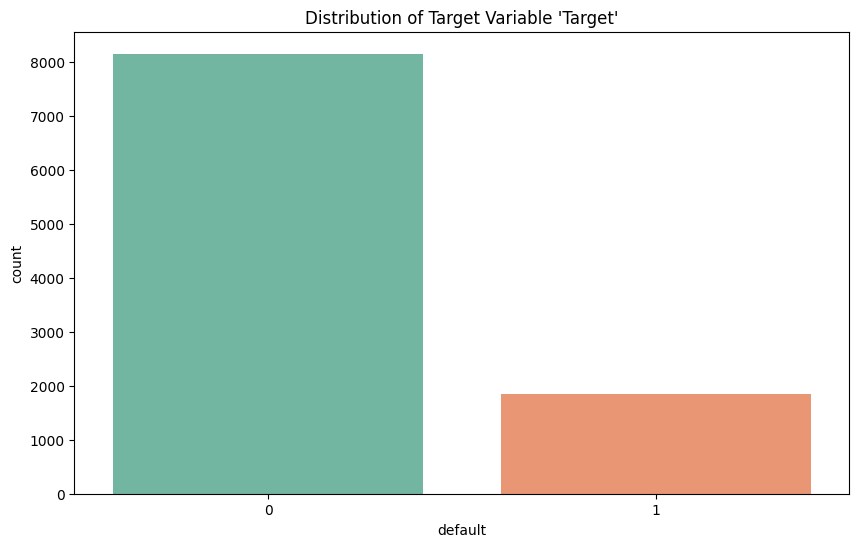

In [30]:
#Analyse de la variable cible
print("\nDistribution of target variable 'Target':")
print(df['default'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='default', palette='Set2')
plt.title("Distribution of Target Variable 'Target'")
plt.grid(False)
plt.show()

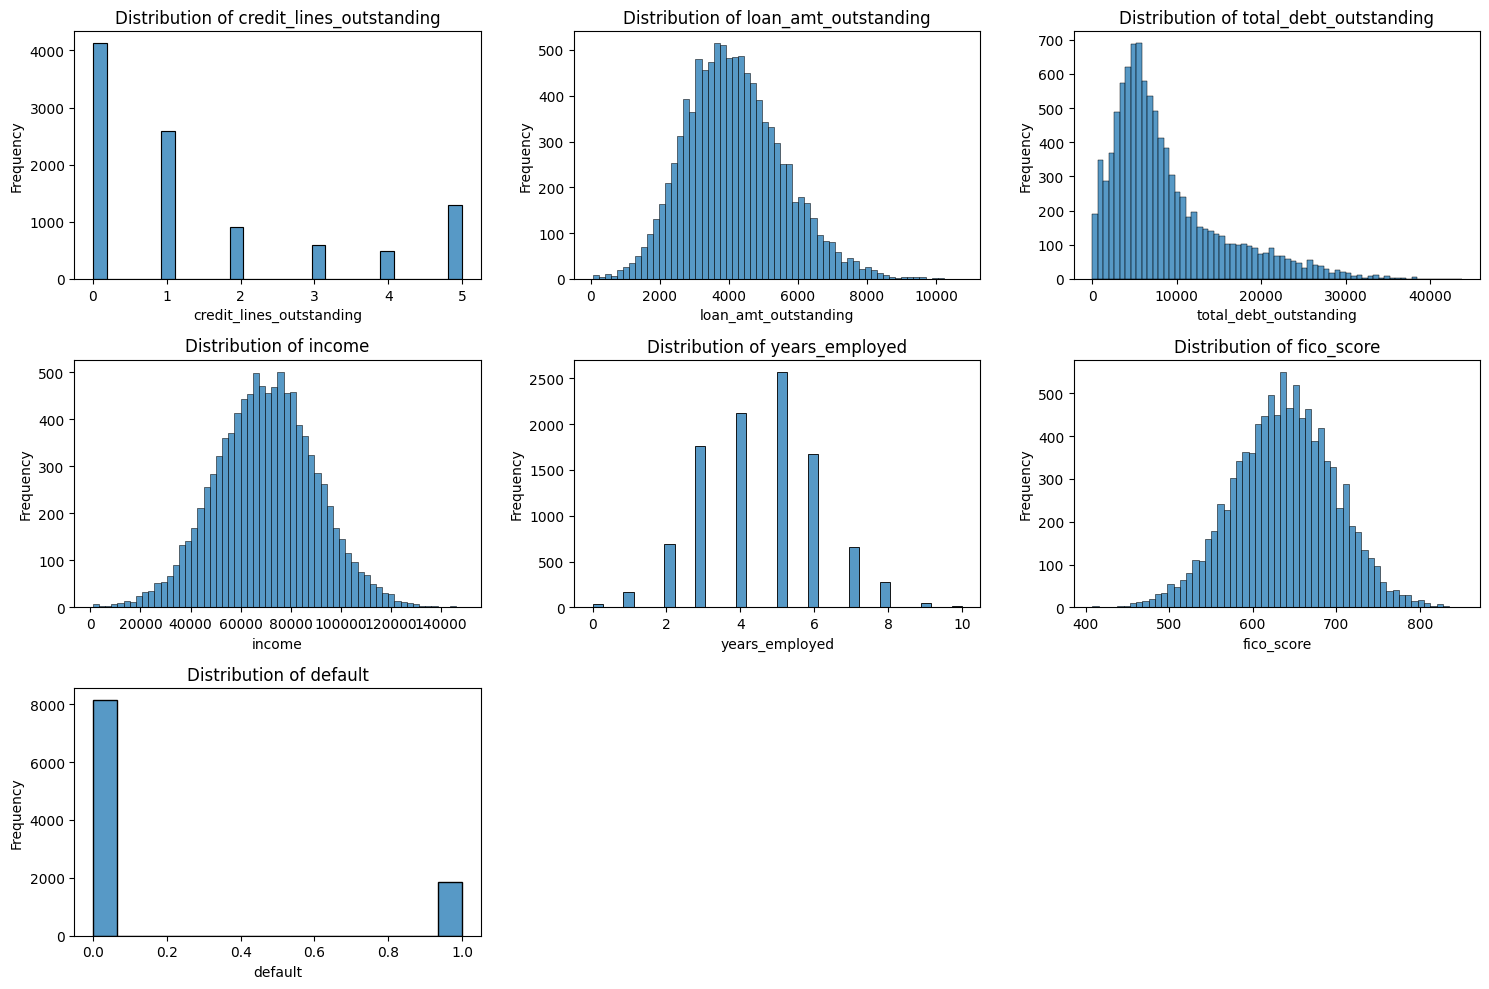

In [31]:
# Garphique de Distribution des variables numeriques
plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


#### Analyse bivariée

In [32]:
# Supprimer la Target 'Default' dans la liste des Features numercis
NUMERICS = [col for col in NUMERICS if col != 'default']
print("\nLes variables numériques:")
NUMERICS


Les variables numériques:


['credit_lines_outstanding',
 'loan_amt_outstanding',
 'total_debt_outstanding',
 'income',
 'years_employed',
 'fico_score']

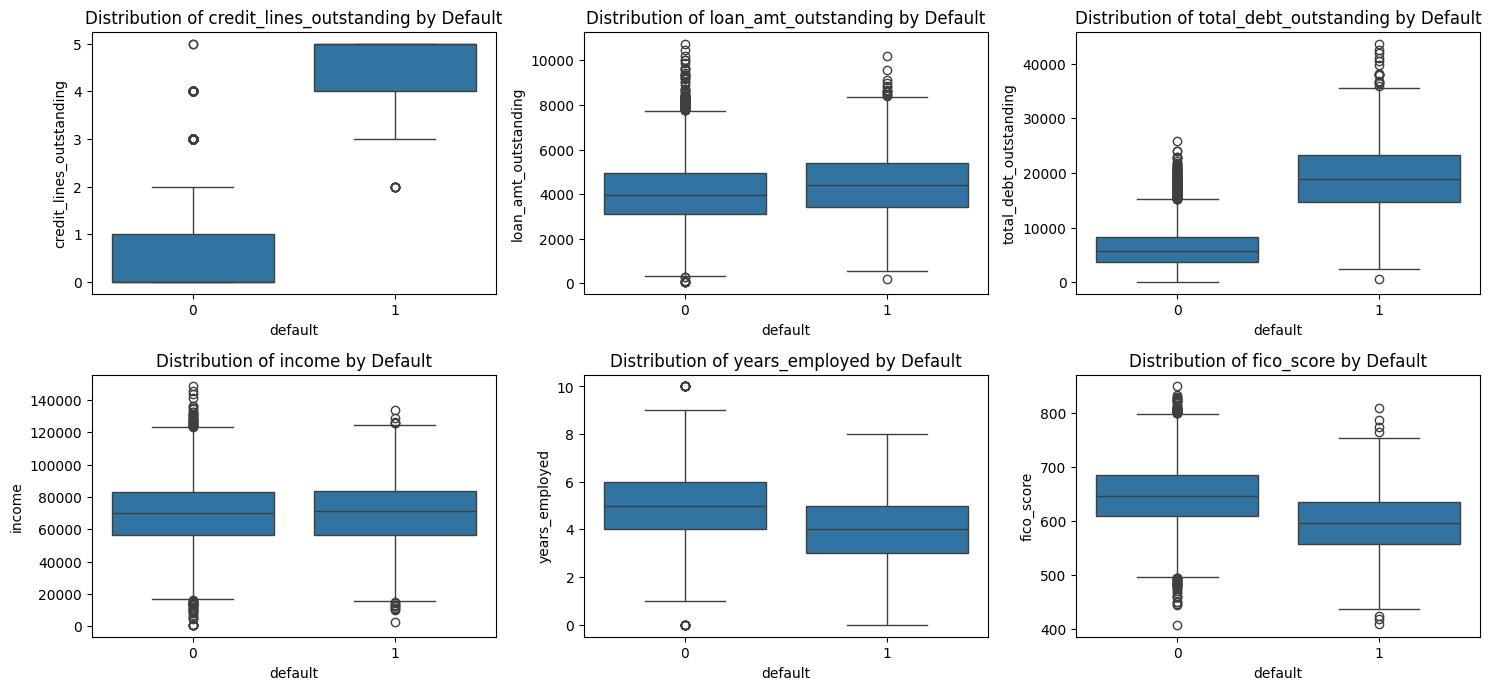


 0: Pas de Defaut de remboursement
 1: Defaut de remboursement


In [33]:
# Rélation entre Default(Defaut de rembourssemnt) et explicatives continue: Boxplot

plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.boxplot(data=df, x='default', y=col)
    plt.title(f'Distribution of {col} by Default')
    plt.xlabel('default')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("\n 0: Pas de Defaut de remboursement\n 1: Defaut de remboursement")


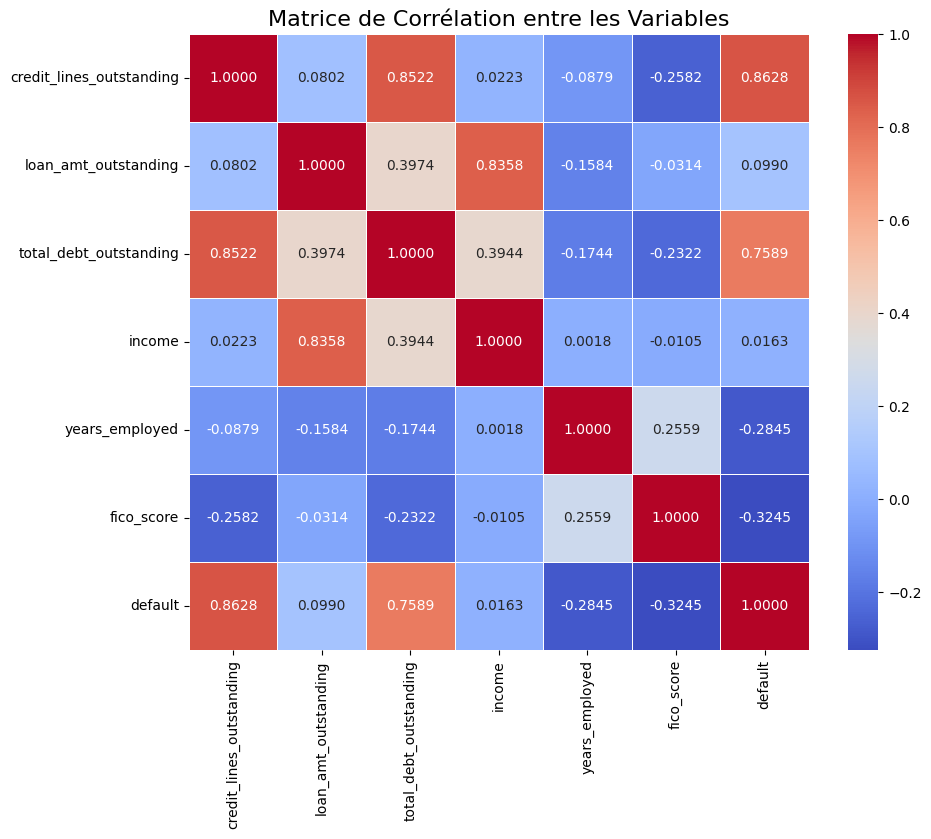

In [34]:
# la matrice de corrélation: Rélation entre 'Default' et explicatives  continues: 
# Permet de soupçonnner un un problème d'endogenéité
correlation_matrix = df[NUMERICS + ['default']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Matrice de Corrélation entre les Variables', fontsize=16)
plt.show()

#### PREPROCESSING (Preparing data for machine learning)

In [35]:
# Verification des NA par colonne
df.isnull().sum()

credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [36]:
CATEGORICALS= list(CATEGORICALS)
X = df[NUMERICS + CATEGORICALS]
y = df['default']

In [37]:
# Les colonnes des FEATURES
X.columns

Index(['credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score'],
      dtype='object')

In [38]:
# Diviser les données en ensembles d'entraînement et de test avec train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Variables numériques
NUMERICS = X_train.select_dtypes(include=[np.number]).columns.tolist()  

In [42]:
# Normalisation des variables quantitatives

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICS),
    ])

In [43]:
# Appliquer la pipline de traitement au données 
X_train_preprocessed = preprocessor.fit_transform(X_train)

X_test_preprocessed = preprocessor.fit_transform(X_test)

In [44]:
# ---- Modèle 2 : Régression Logistique ----

logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Liste scores de prédiction
logistic_recall_scores = []
logistic_y_pred_all = []  # stocker les prédictions la LR


n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lancer la CV
with alive_bar(n_splits, title="Évaluation du modèle Régression Logistique", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle 
        logistic_model.fit(X_train_fold_preprocessed, y_train_fold)
        logistic_y_pred_fold = logistic_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        logistic_y_pred_all.extend(logistic_y_pred_fold)

        # Calcul du rappel
        logistic_recall = recall_score(y_test_fold, logistic_y_pred_fold)
        logistic_recall_scores.append(logistic_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRégression Logistique :\n")
        print(classification_report(y_test_fold, logistic_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen 
mean_logistic_recall = np.mean(logistic_recall_scores)
print(f"\nLe rappel moyen pour la Régression Logistique sur {n_splits} plis est : {mean_logistic_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
logistic_y_test_pred = logistic_model.predict(preprocessor.transform(X_test))

# rapport de classification final 
print("\nRapport de classification final pour la Régression Logistique :\n")
print(classification_report(y_test, logistic_y_test_pred))


on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 5600, Taille de Test : 1400 ---               
on 0:                                                                           
      Régression Logistique :
on 0:               precision    recall  f1-score   support                     
      
                 0       1.00      0.99      0.99      1138
                 1       0.95      1.00      0.98       262
      
          accuracy                           0.99      1400
         macro avg       0.98      0.99      0.99      1400
      weighted avg       0.99      0.99      0.99      1400
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 5600, Taille de Test : 1400 ---               
on 1:                                                               